In [22]:
"""
plots for outputs of 10_crossdataset.py

Shaina Lu
Zador & Gillis Labs
April 2020
"""

'\nplots for outputs of 10_crossdataset.py\n\nShaina Lu\nZador & Gillis Labs\nApril 2020\n'

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns

In [24]:
#function for matplotlib formatting
def set_style():
    plt.style.use(['seaborn-white','seaborn-notebook'])
    plt.rcParams['figure.figsize'] = [6,4]
    plt.rcParams['axes.spines.top'] = False       #remove top line
    plt.rcParams['axes.spines.right'] = False     #remove right line
    plt.rcParams['axes.linewidth'] = 2.0          #set weight of axes
    plt.rcParams['axes.titlesize'] = 20           #set font size of title
    plt.rcParams['axes.labelsize'] = 18           #set font size of x,y labels
    plt.rcParams['axes.labelpad'] = 14            #space between labels and axes
    plt.rcParams['xtick.labelsize'] = 14          #set x label size
    plt.rcParams['ytick.labelsize'] = 14          #set y label size
    plt.rcParams['legend.fontsize'] = 16          #set legend font size
    
set_style()

In [25]:
#code to look at sizes of brain areas
def getsizes(propont, test_allbyall):
    propont = propont.loc[:,test_allbyall.columns] 
    sizes = propont.sum()
    
    totnumsamples = pd.DataFrame(index=list(test_allbyall), columns=list(test_allbyall))
    totnumsamples = totnumsamples.fillna(0)
    minnumsamples = pd.DataFrame(index=list(test_allbyall), columns=list(test_allbyall))
    minnumsamples = minnumsamples.fillna(0)
    maxnumsamples = pd.DataFrame(index=list(test_allbyall), columns=list(test_allbyall))
    maxnumsamples = maxnumsamples.fillna(0)

    areas = list(test_allbyall)
    #for each column, brain area
    for i in range(test_allbyall.shape[1]):
        #for each row in each column
        for j in range(i+1,test_allbyall.shape[1]): #upper triangular!
            area1 = areas[i]
            area2 = areas[j]
            totnumsamples.iloc[i,j] = sizes[area1] + sizes[area2]
            if sizes[area1] >= sizes[area2]:
                minnumsamples.iloc[i,j] = sizes[area2]
                maxnumsamples.iloc[i,j] = sizes[area1]
            else:
                minnumsamples.iloc[i,j] = sizes[area1]
                maxnumsamples.iloc[i,j] = sizes[area2]
                
    return totnumsamples, minnumsamples, maxnumsamples

In [26]:
def aurocbysize(size, allbyall, xlabel, ylabel, savefile):
    size = size.values
    size = size[np.triu_indices_from(size,k=1)]
    allbyall = allbyall.values
    allbyall = allbyall[np.triu_indices_from(allbyall,k=1)]
    
    plt.scatter(size, allbyall, s=0.5, rasterized=True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    if savefile != 0:
        plt.savefig(savefile, bbox_inches='tight')
    plt.show()

In [27]:
ST_CANTIN_FILT_PATH = "/home/slu/spatial/data/cantin_ST_filt_v2.h5"
STpropont = pd.read_hdf(ST_CANTIN_FILT_PATH, key='STpropont', mode='r')

In [7]:
totalST, minsampsST, maxsampsST = getsizes(STpropont, trainST)

NameError: name 'trainST' is not defined

In [28]:
ABA_FILT_PATH = "/home/slu/spatial/data/ABAISH_filt_v6_avgdup.h5"
ABApropont = pd.read_hdf(ABA_FILT_PATH, key='propontology', mode='r')

In [29]:
totalABA, minsampsABA, maxsampsABA = getsizes(ABApropont, trainABA_0p1)

# ST to ABA alpha = 0.1

### Read in Data

In [29]:
STTRAIN_FILE = "/home/slu/spatial/data/cross_lasso/STtoABA_STtrain_f1_0p1_051420.csv"
STTEST_FILE = "/home/slu/spatial/data/cross_lasso/STtoABA_STtest_f1_0p1_051420.csv"
ABAALL_FILE = "/home/slu/spatial/data/cross_lasso/STtoABA_ABAall_f1_0p1_051420.csv"

In [30]:
trainST = pd.read_csv(STTRAIN_FILE, sep=',')
trainST = trainST.set_index(trainST.columns)

testST = pd.read_csv(STTEST_FILE, sep=',')
testST = testST.set_index(testST.columns)

allABA = pd.read_csv(ABAALL_FILE, sep=',')
allABA = allABA.set_index(allABA.columns)

In [32]:
#new var name for comparison
split1testST = testST
split1allABA = allABA

In [11]:
trainST.shape

(445, 445)

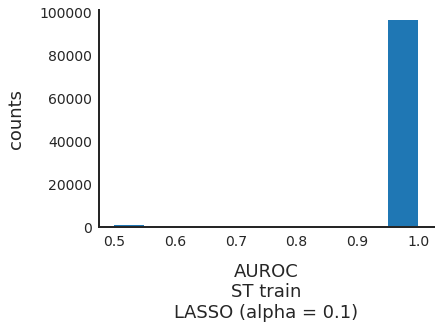

In [12]:
plt.hist(trainST.values[np.triu_indices_from(trainST, k=1)])
plt.xlabel("AUROC\nST train\nLASSO (alpha = 0.1)")
plt.ylabel("counts")
plt.show()

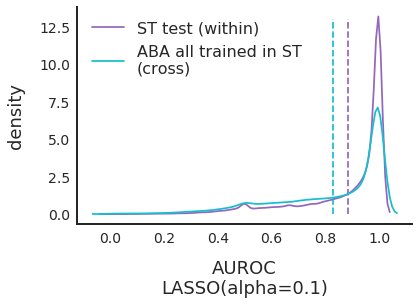

In [13]:
sns.kdeplot(testST.values[np.triu_indices_from(testST, k=1)], label="ST test (within)", color='C4')
sns.kdeplot(allABA.values[np.triu_indices_from(allABA.values, k=1)], label="ABA all trained in ST\n(cross)", color='C9')

#means
plt.vlines(x=np.mean(testST.values[np.triu_indices_from(testST, k=1)]), ymin=0, ymax=13, linestyles='--',colors='C4')
plt.vlines(x=np.mean(allABA.values[np.triu_indices_from(allABA, k=1)]), ymin=0, ymax=13, linestyles='--',colors='C9')

plt.xlabel("AUROC\nLASSO(alpha=0.1)")
plt.ylabel("density")
plt.legend()#loc=[1.0,0.5])

#plt.savefig("062920_4.pdf", bbox_inches='tight')
plt.show()

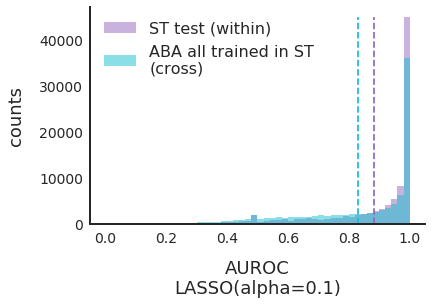

In [14]:
plt.hist(testST.values[np.triu_indices_from(testST, k=1)], label="ST test (within)", color='C4', alpha=0.5, bins=50)
plt.hist(allABA.values[np.triu_indices_from(allABA.values, k=1)], label="ABA all trained in ST\n(cross)", color='C9', alpha=0.5, bins=50)

#means
plt.vlines(x=np.mean(testST.values[np.triu_indices_from(testST, k=1)]), ymin=0, ymax=45000, linestyles='--',colors='C4')
plt.vlines(x=np.mean(allABA.values[np.triu_indices_from(allABA, k=1)]), ymin=0, ymax=45000, linestyles='--',colors='C9')

plt.xlabel("AUROC\nLASSO(alpha=0.1)")
plt.ylabel("counts")
plt.legend()#loc=[1.0,0.5])

#plt.savefig("062920_5.pdf", bbox_inches='tight')
plt.show()

In [15]:
print(np.mean(testST.values[np.triu_indices_from(testST, k=1)]))
print(np.mean(allABA.values[np.triu_indices_from(allABA.values, k=1)]))

0.8840038290743126
0.8289630563889248


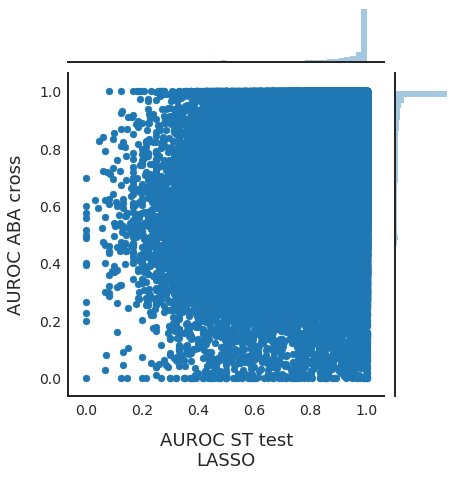

In [45]:
sns.jointplot(testST.values[np.triu_indices_from(testST, k=1)],allABA.values[np.triu_indices_from(allABA.values, k=1)])\
            .set_axis_labels("AUROC ST test\nLASSO", "AUROC ABA cross")
plt.show()

__investigate AUROCs = 0__

In [19]:
print(np.where(trainST == 0))
print(np.where(testST == 0))
print(np.where(allABA == 0))

(array([], dtype=int64), array([], dtype=int64))
(array([ 23, 106, 106, 118, 119, 124, 166, 214, 249, 276, 296, 317, 433]), array([213, 383, 441, 431, 375, 433, 357, 434, 357, 362, 357, 434, 437]))
(array([ 14,  15,  15,  25,  32,  32,  39,  46,  46,  56,  60,  72,  76,
        77,  77,  79, 104, 111, 119, 119, 119, 120, 120, 129, 129, 131,
       131, 131, 131, 131, 131, 131, 131, 166, 171, 193, 196, 196, 196,
       196, 197, 201, 209, 213, 213, 218, 220, 221, 232, 242, 263, 269,
       282, 290, 303, 306, 307, 315, 315, 317, 318, 318, 356, 372, 375,
       403, 403, 404, 404, 423, 434]), array([420,  39, 131, 434, 132, 434, 315, 131, 434,  71, 434, 434, 434,
       131, 306, 423, 423, 131, 131, 382, 404, 131, 353, 288, 403, 171,
       181, 203, 212, 316, 317, 376, 389, 218, 305, 434, 306, 359, 420,
       434, 403, 378, 259, 315, 434, 434, 434, 431, 434, 272, 434, 403,
       423, 434, 356, 308, 434, 434, 437, 434, 356, 359, 434, 434, 434,
       415, 437, 431, 434, 434, 443]))


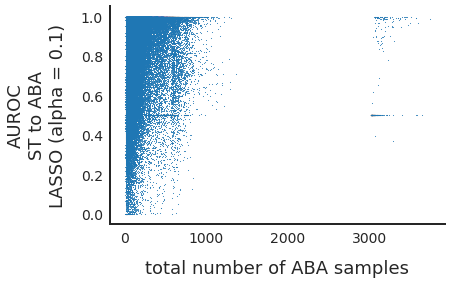

In [42]:
aurocbysize(totalABA, allABA, "total number of ABA samples", "AUROC\nST to ABA\nLASSO (alpha = 0.1)", "041421_7.pdf")


In [97]:
totalST.values[np.where(testST == 0)[0], np.where(testST == 0)[1]]

array([18., 12., 16., 25., 16., 16., 15., 20., 14., 16., 13., 16., 12.])

In [38]:
totalST.values[np.where(allABA == 0)[0], np.where(allABA == 0)[1]]

array([ 56.,  33.,  29.,  22.,  56.,  12.,  18.,  20.,  20.,  13.,  13.,
        93.,  33.,  40.,  56.,  71.,  80.,  20.,  12.,  24.,  16.,  27.,
        46.,  35.,  18.,  22.,  12.,  33.,  18.,  17.,  16.,  49.,  25.,
        23.,  23.,  33.,  40.,  41.,  60.,  24.,  18.,  34.,  55.,  16.,
        14.,  21.,  34.,  18., 216.,  20.,  34.,  20., 103.,  45.,  23.,
        33.,  40.,  14.,  14.,  16.,  20.,  31.,  18.,  25.,  16.,  16.,
        16.,  19.,  16.,  60.,  19.])

In [41]:
totalABA.values[np.where(allABA == 0)[0], np.where(allABA == 0)[1]]

array([ 60.,  58.,  56.,  23.,  86.,  23.,  24.,  24.,  28.,  21.,  24.,
        96.,  54.,  94., 103., 156., 145.,  23.,  22.,  41.,  40.,  61.,
        73.,  35.,  20.,  27.,  15.,  99.,  27.,  71.,  48.,  71.,  15.,
        32.,  30.,  27.,  63.,  85.,  80.,  58.,  23.,  33.,  67.,  35.,
        35.,  33.,  38.,  40., 261.,  33.,  64.,  39., 201., 119.,  36.,
        34.,  67.,  26.,  23.,  52.,  35.,  54.,  34.,  56.,  53.,  32.,
        19.,  54.,  40., 119.,  24.])

# ST to ABA alpha = 0.1 (new split, rand seed = 9)

### Read in Data

In [33]:
STTRAIN_FILE = "/home/slu/spatial/data/cross_lasso/STtoABA_STtrain_f1_0p1newsplit_031921.csv"
STTEST_FILE = "/home/slu/spatial/data/cross_lasso/STtoABA_STtest_f1_0p1newsplit_031921.csv"
ABAALL_FILE = "/home/slu/spatial/data/cross_lasso/STtoABA_ABAall_f1_0p1newsplit_031921.csv"

In [34]:
trainST = pd.read_csv(STTRAIN_FILE, sep=',')
trainST = trainST.set_index(trainST.columns)

testST = pd.read_csv(STTEST_FILE, sep=',')
testST = testST.set_index(testST.columns)

allABA = pd.read_csv(ABAALL_FILE, sep=',')
allABA = allABA.set_index(allABA.columns)

In [35]:
#new var name for comparison
split2testST = testST
split2allABA = allABA

In [10]:
trainST.shape

(445, 445)

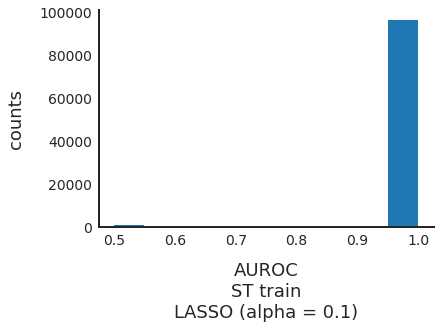

In [11]:
plt.hist(trainST.values[np.triu_indices_from(trainST, k=1)])
plt.xlabel("AUROC\nST train\nLASSO (alpha = 0.1)")
plt.ylabel("counts")
plt.show()

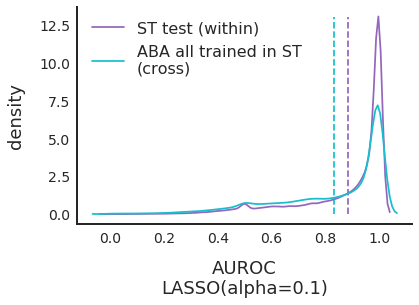

In [12]:
sns.kdeplot(testST.values[np.triu_indices_from(testST, k=1)], label="ST test (within)", color='C4')
sns.kdeplot(allABA.values[np.triu_indices_from(allABA.values, k=1)], label="ABA all trained in ST\n(cross)", color='C9')

#means
plt.vlines(x=np.mean(testST.values[np.triu_indices_from(testST, k=1)]), ymin=0, ymax=13, linestyles='--',colors='C4')
plt.vlines(x=np.mean(allABA.values[np.triu_indices_from(allABA, k=1)]), ymin=0, ymax=13, linestyles='--',colors='C9')

plt.xlabel("AUROC\nLASSO(alpha=0.1)")
plt.ylabel("density")
plt.legend()#loc=[1.0,0.5])

plt.savefig("050521_3.pdf", bbox_inches='tight')
plt.show()

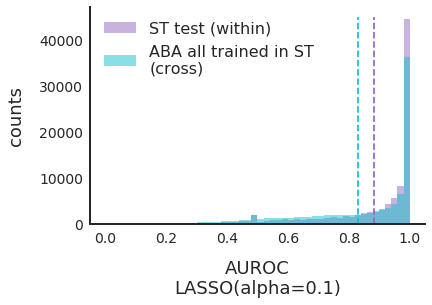

In [13]:
plt.hist(testST.values[np.triu_indices_from(testST, k=1)], label="ST test (within)", color='C4', alpha=0.5, bins=50)
plt.hist(allABA.values[np.triu_indices_from(allABA.values, k=1)], label="ABA all trained in ST\n(cross)", color='C9', alpha=0.5, bins=50)

#means
plt.vlines(x=np.mean(testST.values[np.triu_indices_from(testST, k=1)]), ymin=0, ymax=45000, linestyles='--',colors='C4')
plt.vlines(x=np.mean(allABA.values[np.triu_indices_from(allABA, k=1)]), ymin=0, ymax=45000, linestyles='--',colors='C9')

plt.xlabel("AUROC\nLASSO(alpha=0.1)")
plt.ylabel("counts")
plt.legend()#loc=[1.0,0.5])

plt.savefig("050521_4.pdf", bbox_inches='tight')
plt.show()

In [14]:
print(np.mean(testST.values[np.triu_indices_from(testST, k=1)]))
print(np.mean(allABA.values[np.triu_indices_from(allABA.values, k=1)]))

0.8836387448175906
0.8308863693830951


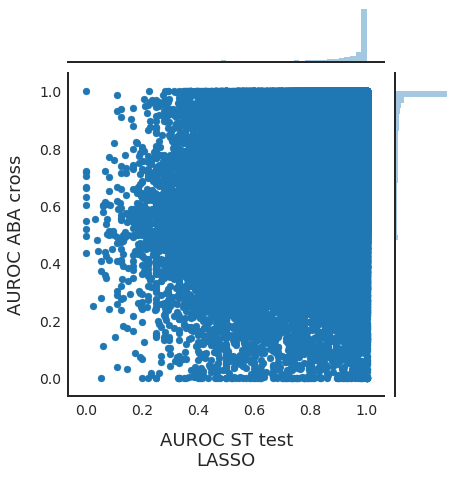

In [15]:
sns.jointplot(testST.values[np.triu_indices_from(testST, k=1)],allABA.values[np.triu_indices_from(allABA.values, k=1)])\
            .set_axis_labels("AUROC ST test\nLASSO", "AUROC ABA cross")
plt.show()

calculate difference between the two train/test splits

In [37]:
split1testST = split1testST.values[np.triu_indices_from(split1testST,k=1)]
split2testST = split2testST.values[np.triu_indices_from(split2testST,k=1)]
split1allABA = split1allABA.values[np.triu_indices_from(split1allABA,k=1)]
split2allABA = split2allABA.values[np.triu_indices_from(split2allABA,k=1)]

In [45]:
np.corrcoef(sp.stats.mstats.rankdata(split1testST),sp.stats.mstats.rankdata(split2testST))

array([[1.       , 0.7353811],
       [0.7353811, 1.       ]])

In [46]:
np.corrcoef(sp.stats.mstats.rankdata(split1allABA),sp.stats.mstats.rankdata(split2allABA))

array([[1.       , 0.7178813],
       [0.7178813, 1.       ]])

In [47]:
def distyx(xdata, ydata):
    """takes in x and y data of a scatter plot and returns the average distance from the y=x line"""
    p1 = np.array([0,0])
    p2 = np.array([1,1])
    dists = []
    for i in range(len(xdata)):
        p3 = np.array([xdata[i],ydata[i]])
        dists.append(np.cross(p2-p1,p3-p1)/np.linalg.norm(p2-p1))
    return np.nanmean(np.abs(dists))

In [48]:
distyx(split1testST, split2testST)

0.05124167295996459

In [49]:
distyx(split1allABA, split2allABA)

0.0726543410967463

# ST to ABA alpha = 0.05

### Read in Data

In [50]:
STTRAIN_FILE = "/home/slu/spatial/data/cross_lasso/STtoABA_STtrain_f1_0p05_051720.csv"
STTEST_FILE = "/home/slu/spatial/data/cross_lasso/STtoABA_STtest_f1_0p05_051720.csv"
ABAALL_FILE = "/home/slu/spatial/data/cross_lasso/STtoABA_ABAall_f1_0p05_051720.csv"

In [51]:
trainST = pd.read_csv(STTRAIN_FILE, sep=',')
trainST = trainST.set_index(trainST.columns)

testST = pd.read_csv(STTEST_FILE, sep=',')
testST = testST.set_index(testST.columns)

allABA = pd.read_csv(ABAALL_FILE, sep=',')
allABA = allABA.set_index(allABA.columns)

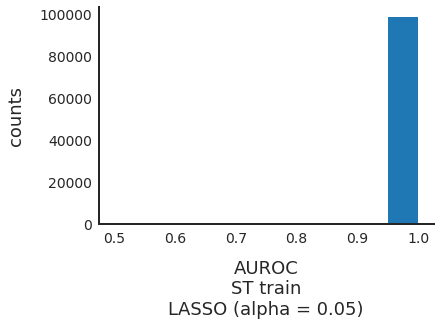

In [52]:
plt.hist(trainST.values[np.triu_indices_from(trainST, k=1)])
plt.xlabel("AUROC\nST train\nLASSO (alpha = 0.05)")
plt.ylabel("counts")
plt.show()

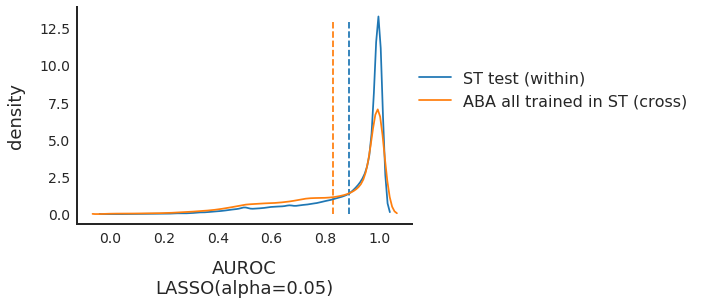

In [53]:
sns.kdeplot(testST.values[np.triu_indices_from(testST, k=1)], label="ST test (within)")
sns.kdeplot(allABA.values[np.triu_indices_from(allABA.values, k=1)], label="ABA all trained in ST (cross)")

#means
plt.vlines(x=np.mean(testST.values[np.triu_indices_from(testST, k=1)]), ymin=0, ymax=13, linestyles='--',colors='C0')
plt.vlines(x=np.mean(allABA.values[np.triu_indices_from(allABA, k=1)]), ymin=0, ymax=13, linestyles='--',colors='C1')

plt.xlabel("AUROC\nLASSO(alpha=0.05)")
plt.ylabel("density")
plt.legend(loc=[1.0,0.5])

#plt.savefig("051920_2.pdf", bbox_inches='tight')
plt.show()

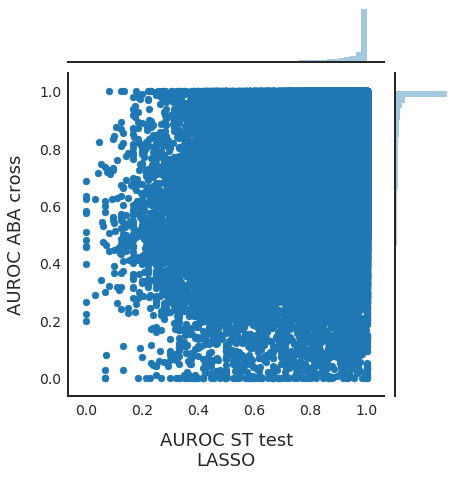

In [54]:
sns.jointplot(testST.values[np.triu_indices_from(testST, k=1)],allABA.values[np.triu_indices_from(allABA.values, k=1)])\
            .set_axis_labels("AUROC ST test\nLASSO", "AUROC ABA cross")
plt.show()

# ST to ABA alpha = 0

### Read in Data

In [37]:
STTRAIN_FILE = "/home/slu/spatial/data/cross_lasso/STtoABA_STtrain_f1_0_051520.csv"
STTEST_FILE = "/home/slu/spatial/data/cross_lasso/STtoABA_STtest_f1_0_051520.csv"
ABAALL_FILE = "/home/slu/spatial/data/cross_lasso/STtoABA_ABAall_f1_0_051520.csv"

In [38]:
trainST = pd.read_csv(STTRAIN_FILE, sep=',')
trainST = trainST.set_index(trainST.columns)

testST = pd.read_csv(STTEST_FILE, sep=',')
testST = testST.set_index(testST.columns)

allABA = pd.read_csv(ABAALL_FILE, sep=',')
allABA = allABA.set_index(allABA.columns)

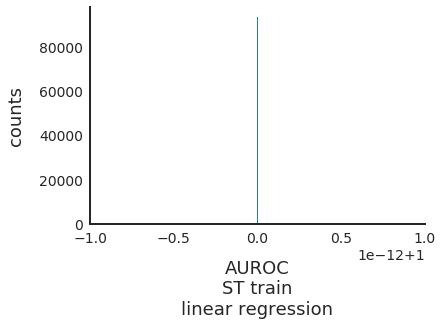

In [39]:
plt.hist(trainST.values[np.triu_indices_from(trainST, k=1)])
plt.xlabel("AUROC\nST train\nlinear regression")
plt.ylabel("counts")
plt.show()

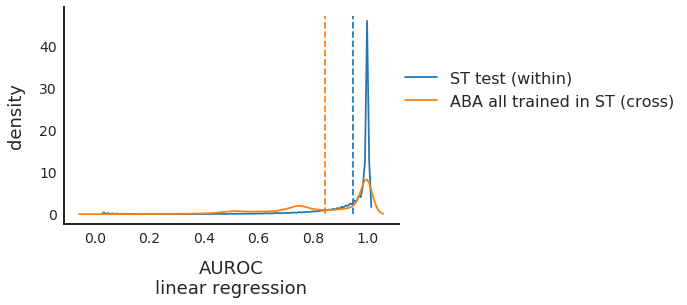

In [40]:
sns.kdeplot(testST.values[np.triu_indices_from(testST, k=1)], label="ST test (within)")
sns.kdeplot(allABA.values[np.triu_indices_from(allABA.values, k=1)], label="ABA all trained in ST (cross)")

#means
plt.vlines(x=np.mean(testST.values[np.triu_indices_from(testST, k=1)]), ymin=0, ymax=47, linestyles='--',colors='C0')
plt.vlines(x=np.mean(allABA.values[np.triu_indices_from(allABA, k=1)]), ymin=0, ymax=47, linestyles='--',colors='C1')

plt.xlabel("AUROC\nlinear regression")
plt.ylabel("density")
plt.legend(loc=[1.0,0.5])

#plt.savefig("051920_3.pdf", bbox_inches='tight')
plt.show()

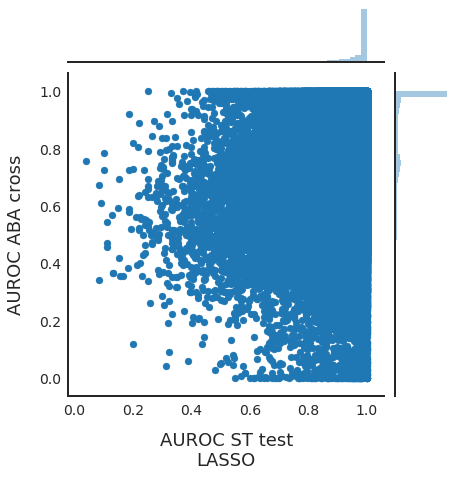

In [59]:
sns.jointplot(testST.values[np.triu_indices_from(testST, k=1)],allABA.values[np.triu_indices_from(allABA.values, k=1)])\
            .set_axis_labels("AUROC ST test\nLASSO", "AUROC ABA cross")
plt.show()

# ABA to ST alpha = 0.1

### Read in Data

In [50]:
ABATRAIN_FILE = "/home/slu/spatial/data/cross_lasso/ABAtoST_ABAtrain_f1_0p1_051420.csv"
ABATEST_FILE = "/home/slu/spatial/data/cross_lasso/ABAtoST_ABAtest_f1_0p1_051420.csv"
STALL_FILE = "/home/slu/spatial/data/cross_lasso/ABAtoST_STall_f1_0p1_051420.csv"

In [51]:
trainABA_0p1 = pd.read_csv(ABATRAIN_FILE, sep=',')
trainABA_0p1 = trainABA_0p1.set_index(trainABA_0p1.columns)

testABA_0p1 = pd.read_csv(ABATEST_FILE, sep=',')
testABA_0p1 = testABA_0p1.set_index(testABA_0p1.columns)

allST_0p1 = pd.read_csv(STALL_FILE, sep=',')
allST_0p1 = allST_0p1.set_index(allST_0p1.columns)

In [53]:
#new vars for comparison to new split
split1testABA = testABA_0p1
split1allST = allST_0p1

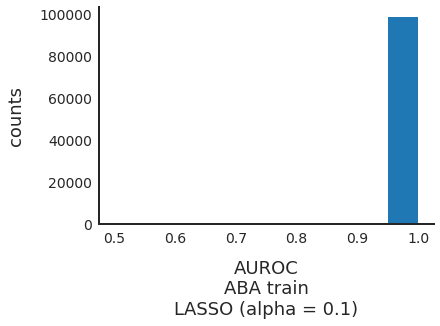

In [73]:
plt.hist(trainABA_0p1.values[np.triu_indices_from(trainABA_0p1, k=1)])
plt.xlabel("AUROC\nABA train\nLASSO (alpha = 0.1)")
plt.ylabel("counts")
plt.show()

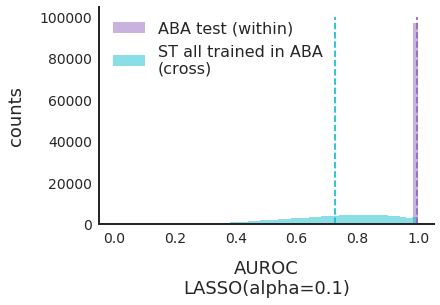

In [74]:
plt.hist(testABA_0p1.values[np.triu_indices_from(testABA_0p1, k=1)], label="ABA test (within)", color='C4', alpha=0.5, bins=50)
plt.hist(allST_0p1.values[np.triu_indices_from(allST_0p1.values, k=1)], label="ST all trained in ABA\n(cross)", color='C9', alpha=0.5, bins=50)

#means
plt.vlines(x=np.mean(testABA_0p1.values[np.triu_indices_from(testABA_0p1, k=1)]), ymin=0, ymax=100000, linestyles='--',colors='C4')
plt.vlines(x=np.mean(allST_0p1.values[np.triu_indices_from(allST_0p1, k=1)]), ymin=0, ymax=100000, linestyles='--',colors='C9')

plt.xlabel("AUROC\nLASSO(alpha=0.1)")
plt.ylabel("counts")
plt.legend()#loc=[1.0,0.5])

#plt.savefig("062920_6.pdf", bbox_inches='tight')
plt.show()

In [75]:
print(np.mean(testABA_0p1.values[np.triu_indices_from(testABA_0p1, k=1)]))
print(np.mean(allST_0p1.values[np.triu_indices_from(allST_0p1.values, k=1)]))

0.9970110668712492
0.7248534250923502


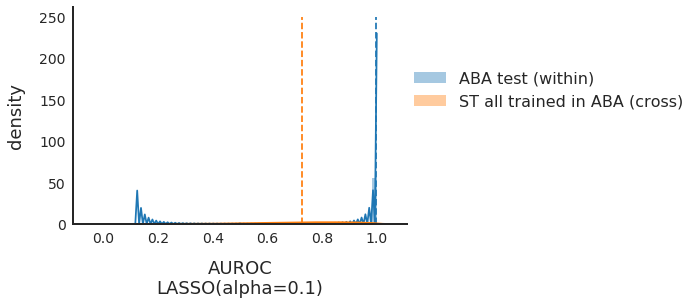

In [76]:
sns.distplot(testABA_0p1.values[np.triu_indices_from(testABA_0p1, k=1)], label="ABA test (within)")
sns.distplot(allST_0p1.values[np.triu_indices_from(allST_0p1.values, k=1)], label="ST all trained in ABA (cross)")

#means
plt.vlines(x=np.mean(testABA_0p1.values[np.triu_indices_from(testABA_0p1, k=1)]), ymin=0, ymax=250, linestyles='--',colors='C0')
plt.vlines(x=np.mean(allST_0p1.values[np.triu_indices_from(allST_0p1, k=1)]), ymin=0, ymax=250, linestyles='--',colors='C1')

plt.xlabel("AUROC\nLASSO(alpha=0.1)")
plt.ylabel("density")
plt.legend(loc=[1.0,0.5])

#plt.savefig("051920_4.pdf", bbox_inches='tight')
plt.show()

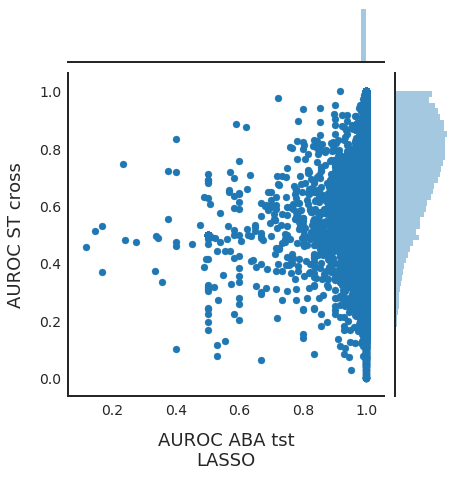

In [77]:
sns.jointplot(testABA_0p1.values[np.triu_indices_from(testABA_0p1, k=1)],allST_0p1.values[np.triu_indices_from(allST_0p1.values, k=1)])\
            .set_axis_labels("AUROC ABA tst\nLASSO", "AUROC ST cross")
plt.show()

__investigate AUROCs = 0__

In [80]:
print(np.where(trainABA_0p1 == 0))
print(np.where(testABA_0p1 == 0))
print(np.where(allST_0p1 == 0))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([ 53,  56,  59,  69,  69, 172, 172, 214, 249, 250, 293]), array([293, 395, 293, 180, 293, 407, 410, 293, 293, 293, 407]))


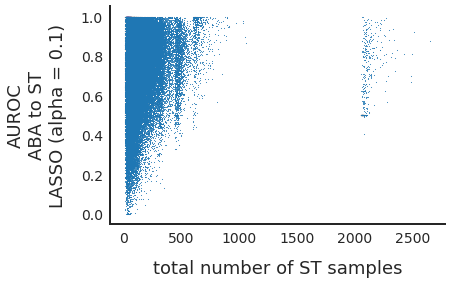

In [86]:
aurocbysize(totalST, allST_0p1, "total number of ST samples", "AUROC\nABA to ST\nLASSO (alpha = 0.1)", "041421_9.pdf")

In [87]:
totalST.values[np.where(allST_0p1 == 0)[0], np.where(allST_0p1 == 0)[1]]

array([29., 16., 28., 44., 43., 50., 26., 36., 29., 38., 55.])

In [88]:
totalABA.values[np.where(allST_0p1 == 0)[0], np.where(allST_0p1 == 0)[1]]

array([ 42.,  19.,  25., 661., 647.,  79.,  23.,  37.,  48.,  44.,  82.])

# ABA to ST alpha = 0.1 (new split, rand seed = 9)

### Read in Data

In [54]:
ABATRAIN_FILE = "/home/slu/spatial/data/cross_lasso/ABAtoST_ABAtrain_f1_0p1newsplit_031921.csv"
ABATEST_FILE = "/home/slu/spatial/data/cross_lasso/ABAtoST_ABAtest_f1_0p1newsplit_031921.csv"
STALL_FILE = "/home/slu/spatial/data/cross_lasso/ABAtoST_STall_f1_0p1newsplit_031921.csv"

In [55]:
trainABA_0p1 = pd.read_csv(ABATRAIN_FILE, sep=',')
trainABA_0p1 = trainABA_0p1.set_index(trainABA_0p1.columns)

testABA_0p1 = pd.read_csv(ABATEST_FILE, sep=',')
testABA_0p1 = testABA_0p1.set_index(testABA_0p1.columns)

allST_0p1 = pd.read_csv(STALL_FILE, sep=',')
allST_0p1 = allST_0p1.set_index(allST_0p1.columns)

In [56]:
#new vars for comparison
split2testABA = testABA_0p1
split2allST = allST_0p1

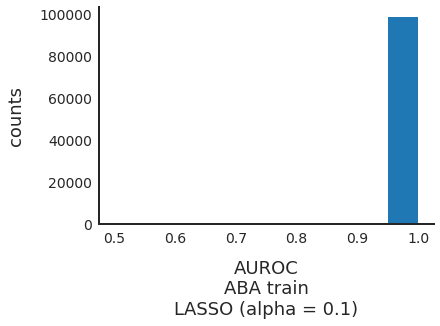

In [18]:
plt.hist(trainABA_0p1.values[np.triu_indices_from(trainABA_0p1, k=1)])
plt.xlabel("AUROC\nABA train\nLASSO (alpha = 0.1)")
plt.ylabel("counts")
plt.show()

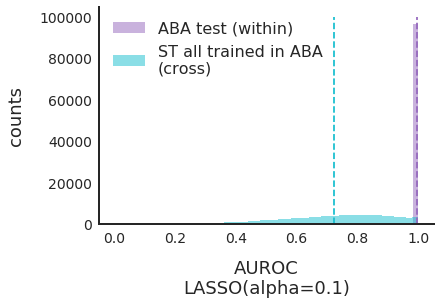

In [19]:
plt.hist(testABA_0p1.values[np.triu_indices_from(testABA_0p1, k=1)], label="ABA test (within)", color='C4', alpha=0.5, bins=50)
plt.hist(allST_0p1.values[np.triu_indices_from(allST_0p1.values, k=1)], label="ST all trained in ABA\n(cross)", color='C9', alpha=0.5, bins=50)

#means
plt.vlines(x=np.mean(testABA_0p1.values[np.triu_indices_from(testABA_0p1, k=1)]), ymin=0, ymax=100000, linestyles='--',colors='C4')
plt.vlines(x=np.mean(allST_0p1.values[np.triu_indices_from(allST_0p1, k=1)]), ymin=0, ymax=100000, linestyles='--',colors='C9')

plt.xlabel("AUROC\nLASSO(alpha=0.1)")
plt.ylabel("counts")
plt.legend()#loc=[1.0,0.5])

plt.savefig("050521_5.pdf", bbox_inches='tight')
plt.show()

In [20]:
print(np.mean(testABA_0p1.values[np.triu_indices_from(testABA_0p1, k=1)]))
print(np.mean(allST_0p1.values[np.triu_indices_from(allST_0p1.values, k=1)]))

0.9968151891722891
0.7223445293277505


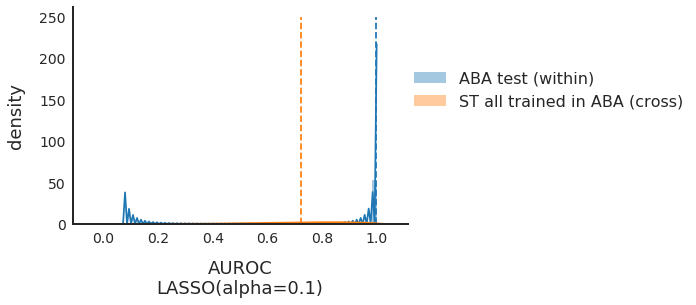

In [21]:
sns.distplot(testABA_0p1.values[np.triu_indices_from(testABA_0p1, k=1)], label="ABA test (within)")
sns.distplot(allST_0p1.values[np.triu_indices_from(allST_0p1.values, k=1)], label="ST all trained in ABA (cross)")

#means
plt.vlines(x=np.mean(testABA_0p1.values[np.triu_indices_from(testABA_0p1, k=1)]), ymin=0, ymax=250, linestyles='--',colors='C0')
plt.vlines(x=np.mean(allST_0p1.values[np.triu_indices_from(allST_0p1, k=1)]), ymin=0, ymax=250, linestyles='--',colors='C1')

plt.xlabel("AUROC\nLASSO(alpha=0.1)")
plt.ylabel("density")
plt.legend(loc=[1.0,0.5])

#plt.savefig("051920_4.pdf", bbox_inches='tight')
plt.show()

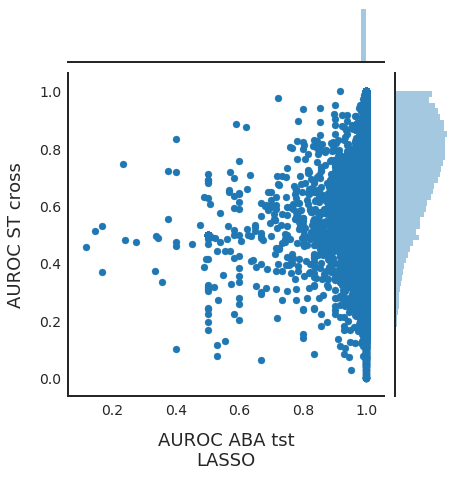

In [77]:
sns.jointplot(testABA_0p1.values[np.triu_indices_from(testABA_0p1, k=1)],allST_0p1.values[np.triu_indices_from(allST_0p1.values, k=1)])\
            .set_axis_labels("AUROC ABA tst\nLASSO", "AUROC ST cross")
plt.show()

calculate difference between the two train/test splits

In [57]:
split1testABA = split1testABA.values[np.triu_indices_from(split1testABA,k=1)]
split2testABA = split2testABA.values[np.triu_indices_from(split2testABA,k=1)]
split1allST = split1allST.values[np.triu_indices_from(split1allST,k=1)]
split2allST = split2allST.values[np.triu_indices_from(split2allST,k=1)]

In [58]:
np.corrcoef(sp.stats.mstats.rankdata(split1testABA),sp.stats.mstats.rankdata(split2testABA))

array([[1.        , 0.77979954],
       [0.77979954, 1.        ]])

In [59]:
np.corrcoef(sp.stats.mstats.rankdata(split1allST),sp.stats.mstats.rankdata(split2allST))

array([[1.        , 0.81580427],
       [0.81580427, 1.        ]])

In [60]:
def distyx(xdata, ydata):
    """takes in x and y data of a scatter plot and returns the average distance from the y=x line"""
    p1 = np.array([0,0])
    p2 = np.array([1,1])
    dists = []
    for i in range(len(xdata)):
        p3 = np.array([xdata[i],ydata[i]])
        dists.append(np.cross(p2-p1,p3-p1)/np.linalg.norm(p2-p1))
    return np.nanmean(np.abs(dists))

In [61]:
distyx(split1testABA, split2testABA)

0.0018617889483474501

In [62]:
distyx(split1allST, split2allST)

0.051004583242848706

# ABA to ST alpha = 0.05

### Read in Data

In [11]:
ABATRAIN_FILE = "/home/slu/spatial/data/cross_lasso/ABAtoST_ABAtrain_f1_0p05_051720.csv"
ABATEST_FILE = "/home/slu/spatial/data/cross_lasso/ABAtoST_ABAtest_f1_0p05_051720.csv"
STALL_FILE = "/home/slu/spatial/data/cross_lasso/ABAtoST_STall_f1_0p05_051720.csv"

In [13]:
trainABA_0p05 = pd.read_csv(ABATRAIN_FILE, sep=',')
trainABA_0p05 = trainABA_0p05.set_index(trainABA_0p05.columns)

testABA_0p05 = pd.read_csv(ABATEST_FILE, sep=',')
testABA_0p05 = testABA_0p05.set_index(testABA_0p05.columns)

allST_0p05 = pd.read_csv(STALL_FILE, sep=',')
allST_0p05 = allST_0p05.set_index(allST_0p05.columns)

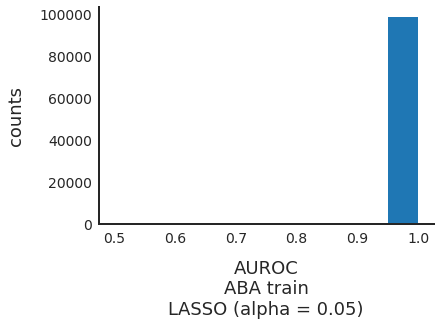

In [14]:
plt.hist(trainABA_0p05.values[np.triu_indices_from(trainABA_0p05, k=1)])
plt.xlabel("AUROC\nABA train\nLASSO (alpha = 0.05)")
plt.ylabel("counts")
plt.show()

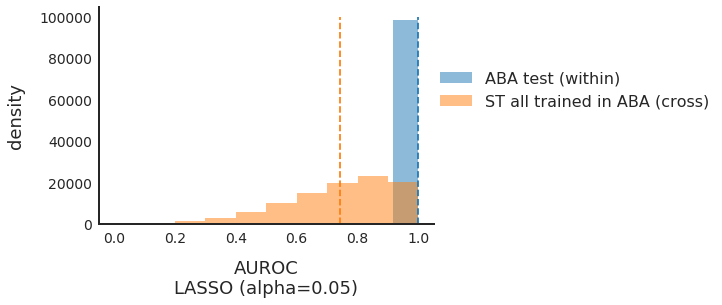

In [15]:
plt.hist(testABA_0p05.values[np.triu_indices_from(testABA_0p05, k=1)], label="ABA test (within)", alpha=0.5)
plt.hist(allST_0p05.values[np.triu_indices_from(allST_0p05.values, k=1)], label="ST all trained in ABA (cross)", alpha=0.5)

#means
plt.vlines(x=np.mean(testABA_0p05.values[np.triu_indices_from(testABA_0p05, k=1)]), ymin=0, ymax=100000, linestyles='--',colors='C0')
plt.vlines(x=np.mean(allST_0p05.values[np.triu_indices_from(allST_0p05, k=1)]), ymin=0, ymax=100000, linestyles='--',colors='C1')

plt.xlabel("AUROC\nLASSO (alpha=0.05)")
plt.ylabel("density")
plt.legend(loc=[1.0,0.5])

#plt.savefig("051920_5.pdf", bbox_inches='tight')
plt.show()

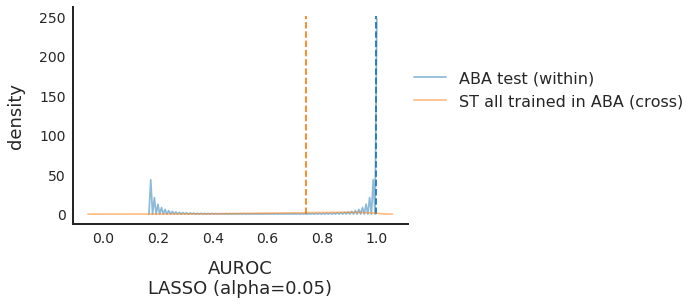

In [16]:
sns.kdeplot(testABA_0p05.values[np.triu_indices_from(testABA_0p05, k=1)], label="ABA test (within)", alpha=0.5)
sns.kdeplot(allST_0p05.values[np.triu_indices_from(allST_0p05.values, k=1)], label="ST all trained in ABA (cross)", alpha=0.5)

#means
plt.vlines(x=np.mean(testABA_0p05.values[np.triu_indices_from(testABA_0p05, k=1)]), ymin=0, ymax=250, linestyles='--',colors='C0')
plt.vlines(x=np.mean(allST_0p05.values[np.triu_indices_from(allST_0p05, k=1)]), ymin=0, ymax=250, linestyles='--',colors='C1')

plt.xlabel("AUROC\nLASSO (alpha=0.05)")
plt.ylabel("density")
plt.legend(loc=[1.0,0.5])

#plt.savefig("051920_4.pdf", bbox_inches='tight')
plt.show()

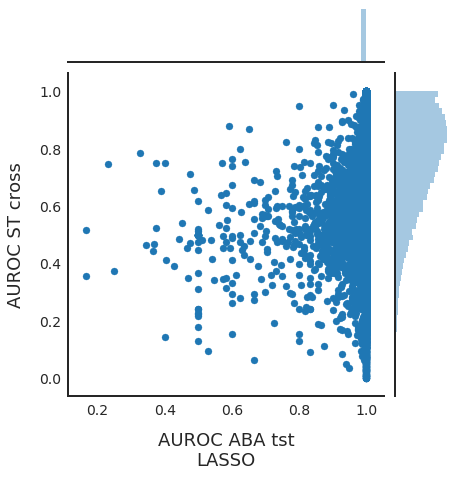

In [17]:
sns.jointplot(testABA_0p05.values[np.triu_indices_from(testABA_0p05, k=1)],allST_0p05.values[np.triu_indices_from(allST_0p05.values, k=1)])\
            .set_axis_labels("AUROC ABA tst\nLASSO", "AUROC ST cross")
plt.show()

# ABA to ST linear regression

### Read in Data

In [19]:
ABATRAIN_FILE = "/home/slu/spatial/data/cross_lasso/ABAtoST_ABAtrain_f1_0_051520.csv"
ABATEST_FILE = "/home/slu/spatial/data/cross_lasso/ABAtoST_ABAtest_f1_0_051520.csv"
STALL_FILE = "/home/slu/spatial/data/cross_lasso/ABAtoST_STall_f1_0_051520.csv"

In [20]:
trainABA_0 = pd.read_csv(ABATRAIN_FILE, sep=',')
trainABA_0 = trainABA_0.set_index(trainABA_0.columns)

testABA_0 = pd.read_csv(ABATEST_FILE, sep=',')
testABA_0 = testABA_0.set_index(testABA_0.columns)

allST_0 = pd.read_csv(STALL_FILE, sep=',')
allST_0 = allST_0.set_index(allST_0.columns)

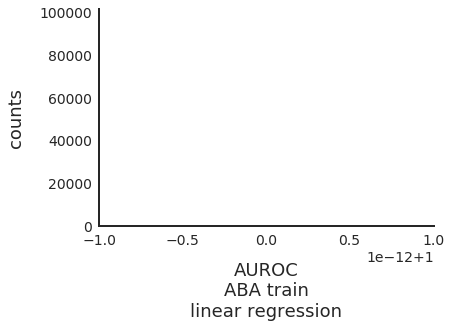

In [21]:
plt.hist(trainABA_0.values[np.triu_indices_from(trainABA_0, k=1)])
plt.xlabel("AUROC\nABA train\nlinear regression")
plt.ylabel("counts")
plt.show()

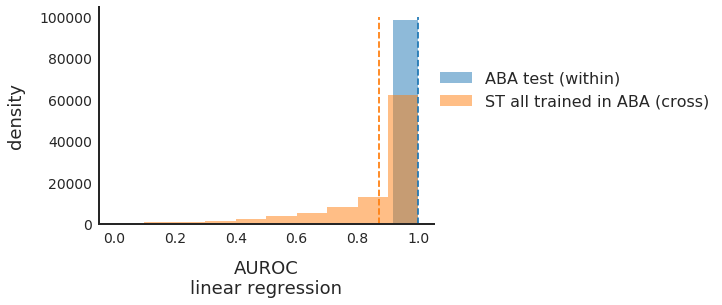

In [24]:
plt.hist(testABA_0.values[np.triu_indices_from(testABA_0, k=1)], label="ABA test (within)", alpha=0.5)
plt.hist(allST_0.values[np.triu_indices_from(allST_0.values, k=1)], label="ST all trained in ABA (cross)", alpha=0.5)

#means
plt.vlines(x=np.mean(testABA_0.values[np.triu_indices_from(testABA_0, k=1)]), ymin=0, ymax=100000, linestyles='--',colors='C0')
plt.vlines(x=np.mean(allST_0.values[np.triu_indices_from(allST_0, k=1)]), ymin=0, ymax=100000, linestyles='--',colors='C1')

plt.xlabel("AUROC\nlinear regression")
plt.ylabel("density")
plt.legend(loc=[1.0,0.5])

#plt.savefig("051920_6.pdf", bbox_inches='tight')
plt.show()

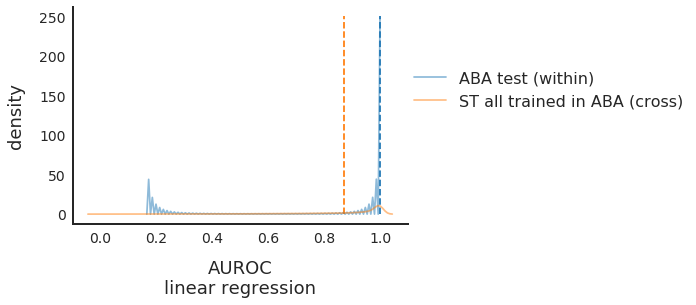

In [25]:
sns.kdeplot(testABA_0.values[np.triu_indices_from(testABA_0, k=1)], label="ABA test (within)", alpha=0.5)
sns.kdeplot(allST_0.values[np.triu_indices_from(allST_0.values, k=1)], label="ST all trained in ABA (cross)", alpha=0.5)

#means
plt.vlines(x=np.mean(testABA_0.values[np.triu_indices_from(testABA_0, k=1)]), ymin=0, ymax=250, linestyles='--',colors='C0')
plt.vlines(x=np.mean(allST_0.values[np.triu_indices_from(allST_0, k=1)]), ymin=0, ymax=250, linestyles='--',colors='C1')

plt.xlabel("AUROC\nlinear regression")
plt.ylabel("density")
plt.legend(loc=[1.0,0.5])

#plt.savefig("051920_4.pdf", bbox_inches='tight')
plt.show()

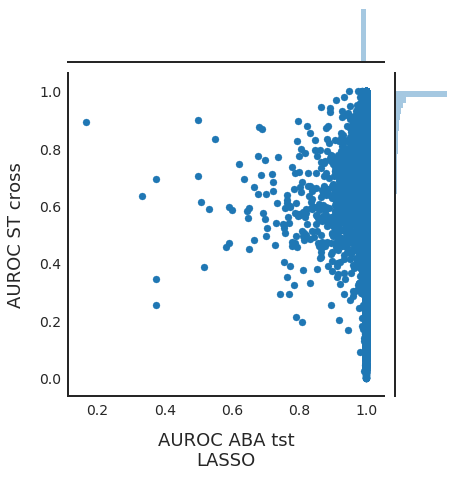

In [26]:
sns.jointplot(testABA_0.values[np.triu_indices_from(testABA_0, k=1)],allST_0.values[np.triu_indices_from(allST_0.values, k=1)])\
            .set_axis_labels("AUROC ABA tst\nLASSO", "AUROC ST cross")
plt.show()

# Increase in pairs w/ AUROC = 1 for ABA to ST linear regresison

There is a marked increase in brain area pairs that have an AUROC=1 in ST when training in ABA in linear regression than in either of the prior regularizations of LASSO. Why?

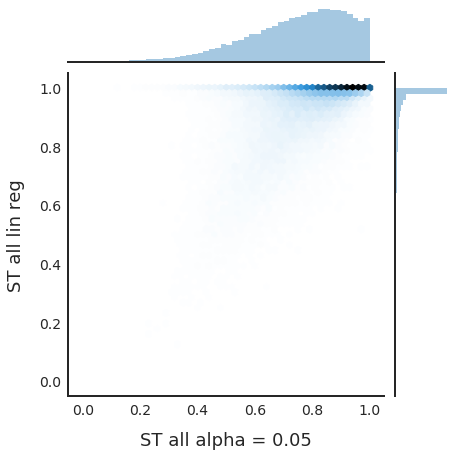

In [121]:
sns.jointplot(allST_0p05, allST_0,kind='hex').set_axis_labels("ST all alpha = 0.05","ST all lin reg")
plt.savefig("052620_1.pdf", bbox_inches='tight')
plt.show()

What are the brain areas that have an AUROC = 1 in linear regression but not LASSO?

In [37]:
perfarea0 = np.where(allST_0 == 1.0)
perfarea0p05 = np.where(allST_0p05 == 1.0)
perfarea0p1 = np.where(allST_0p1 == 1.0)

In [38]:
print(len(perfarea0[0]))
print(len(perfarea0p05[0]))
print(len(perfarea0p1[0]))

16519
660
572


In [59]:
#convert np.where coords to list of tuples
perfarea0 = [(perfarea0[0][i], perfarea0[1][i]) for i in range(0, len(perfarea0[0]))] 
perfarea0p05 = [(perfarea0p05[0][i], perfarea0p05[1][i]) for i in range(0, len(perfarea0p05[0]))]
perfarea0p1 = [(perfarea0p1[0][i], perfarea0p1[1][i]) for i in range(0, len(perfarea0p1[0]))] 

In [139]:
filt1 = allST_0 == 1.0
filt2 = allST_0p05 < 1.0
filt3 = np.logical_and(filt1, filt2)
onlylinreg0 = np.where(filt3 == True)

print(len(onlylinreg0[0]))

16102


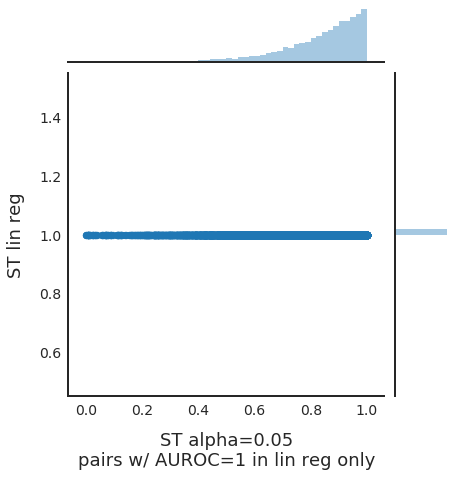

In [148]:
sns.jointplot(allST_0p05[filt3],allST_0[filt3]).set_axis_labels("ST alpha=0.05\npairs w/ AUROC=1 in lin reg only","ST lin reg")
#plt.savefig("052620_6.pdf", bbox_inches='tight')
plt.show()

In [62]:
onlylinreg = []
for i in range(len(perfarea0)):
    if perfarea0[i] in perfarea0p05:
        continue
    else:
        onlylinreg.append(perfarea0[i])

In [65]:
print(len(onlylinreg))
print(len(perfarea0)-len(perfarea0p05))

16102
15859


In [ ]:
filt1 = allST_0 < 1.0
filt2 = allST_0p05 < 1.0
filt3 = np.logical_and(filt1, filt2)
bothlow = np.where(filt3 == True)

import cross dataset functions and code

In [84]:
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split #stratify train/test split
import random

In [72]:
#file paths
ALLEN_FILT_PATH = "/home/slu/spatial/data/ABAISH_filt_v6_avgdup.h5"
ONTOLOGY_PATH = "/data/slu/allen_adult_mouse_ISH/ontologyABA.csv"
ST_CANTIN_FILT_PATH = "/home/slu/spatial/data/cantin_ST_filt_v2.h5"
#NCBI_CONV_PATH = "/data/slu/refs/ncbi_mouse_gene_info_190913"

In [73]:
#ABA
def read_ABAdata():
    """read in all ABA datasets needed using pandas"""
    metabrain = pd.read_hdf(ALLEN_FILT_PATH, key='metabrain', mode='r')
    voxbrain = pd.read_hdf(ALLEN_FILT_PATH, key='avgvoxbrain', mode='r')
    propontvox = pd.read_hdf(ALLEN_FILT_PATH, key='propontology', mode='r')
    #geneIDName = pd.read_hdf(ALLEN_FILT_PATH, key='geneIDName', mode='r')	

    return metabrain, voxbrain, propontvox

#ST
def read_STdata():
    """read in all ST datasets needed using pandas"""
    STspotsmeta = pd.read_hdf(ST_CANTIN_FILT_PATH, key='STspotsmeta', mode='r')
    STspots = pd.read_hdf(ST_CANTIN_FILT_PATH, key='STspots', mode='r')
    STpropont = pd.read_hdf(ST_CANTIN_FILT_PATH, key='STpropont', mode='r')
    
    return STspotsmeta, STspots, STpropont

def read_ontology():
    ontology = pd.read_csv(ONTOLOGY_PATH)
    ontology = ontology.drop([ontology.columns[5], ontology.columns[6]], axis=1)
    ontology = ontology.fillna(-1)  #make root's parent -1

    return ontology

In [75]:
def filterproponto(sampleonto):
    """pre-processing for propogated ontology"""
    #remove brain areas that don't have any samples
    sampleonto_sums = sampleonto.apply(lambda col: col.sum(), axis=0)
    sampleonto = sampleonto.loc[:,sampleonto_sums > 5] #greater than 5 becuase less is not enough for train/test split to have non-zero areas
    
    return sampleonto

def getleaves(propontvox, ontology):
    """helper function to get only leaf brain areas"""
    #leaves are brain areas in the ontology that never show up in the parent column
    allareas = list(propontvox)
    parents = list(ontology.parent)
    for i in range(len(parents)): #convert parents from float to int, ids are ints
        parents[i] = int(parents[i])
    
    #remove parents from all areas
    leaves = []
    for area in allareas:
        if int(area) not in parents:
            leaves.append(area)
    
    print("number of leaf areas: %d" %len(leaves))
    return leaves

def findoverlapareas(STonto, propontvox, ontology):
    """find leaf brain areas overlapping between the two datasets"""
    leafST = getleaves(STonto, ontology)
    leafABA = getleaves(propontvox, ontology)

    leafboth = [] 
    for i in range(len(leafABA)):
        if leafABA[i] in leafST:
            leafboth.append(leafABA[i])
    
    STonto = STonto.loc[:,leafboth]
    propontvox = propontvox.loc[:,leafboth]
    
    return STonto, propontvox    

def zscore(voxbrain):
    """zscore voxbrain or subsets of voxbrain (rows: voxels, cols: genes)"""
    #z-score on whole data set before splitting into test and train
    scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
    scaler.fit(voxbrain)
    z_voxbrain = scaler.transform(voxbrain)
    
    #store z-scored voxbrain as pandas dataframe
    z_voxbrain = pd.DataFrame(z_voxbrain)
    z_voxbrain.columns = voxbrain.columns
    z_voxbrain.index = voxbrain.index
    
    return z_voxbrain

def analytical_auroc(featurevector, binarylabels):
    """analytical calculation of auroc
       inputs: feature (mean rank of expression level), binary label (ctxnotctx)
       returns: auroc
    """
    #sort ctxnotctx binary labels by mean rank, aescending
    s = sorted(zip(featurevector, binarylabels))
    feature_sort, binarylabels_sort = map(list, zip(*s))

    #get the sum of the ranks in feature vector corresponding to 1's in binary vector
    sumranks = 0
    for i in range(len(binarylabels_sort)):
        if binarylabels_sort[i] == 1:
            sumranks = sumranks + feature_sort[i]
    
    poslabels = binarylabels.sum()
    neglabels = (len(binarylabels) - poslabels)
    
    auroc = ((sumranks/(neglabels*poslabels)) - ((poslabels+1)/(2*neglabels)))
    
    return auroc

def getoverlapgenes(STspots, ABAvox):
    ABAgenes = list(ABAvox)
    STgenes = list(STspots)
    
    #get overlapping genes
    overlap = []
    for i in range(len(ABAgenes)):
        if ABAgenes[i] in STgenes:
            overlap.append(ABAgenes[i])
    
    print("number of overlapping genes: %d" %len(overlap))
    
    #index datasets to keep only genes that are overlapping
    STspots = STspots.loc[:,overlap]
    ABAvox = ABAvox.loc[:,overlap]
    
    return STspots, ABAvox

In [87]:
def applyLASSO(Xtrain, Xtest, Xcross, ytrain, ytest, ycross):
    """apply LASSO regression"""
    #lasso_reg = sklearn.linear_model.Lasso(alpha=alphaval)
    #lasso_reg = Lasso(alpha=0.1,max_iter=10000) #alpha=alphaval) #,max_iter=10000)
    lasso_reg = LinearRegression()
    lasso_reg.fit(Xtrain, ytrain)
    
    #train
    predictions_train = lasso_reg.predict(Xtrain)
    auroc_train = analytical_auroc(sp.stats.mstats.rankdata(predictions_train), ytrain)
    #auroc_train = metrics.roc_auc_score(y_true = ytrain, y_score = predictions_train)
    #test
    predictions_test = lasso_reg.predict(Xtest)
    auroc_test = analytical_auroc(sp.stats.mstats.rankdata(predictions_test), ytest)
    #auroc_test = metrics.roc_auc_score(y_true = ytest, y_score = predictions_test)
    
    #cross
    predictions_cross = lasso_reg.predict(Xcross)
    auroc_cross = analytical_auroc(sp.stats.mstats.rankdata(predictions_cross), ycross)
    
    return auroc_train, auroc_test, auroc_cross, lasso_reg

In [135]:
mod_data = ABAvox
mod_propont = ABApropont
cross_data = STspots
cross_propont = STpropont
#def getallbyall(mod_data, mod_propont, cross_data, cross_propont):
#initialize zeros dataframe to store entries
allbyall_test = pd.DataFrame(index=list(mod_propont), columns=list(mod_propont))
allbyall_train = pd.DataFrame(index=list(mod_propont), columns=list(mod_propont))
allbyall_cross = pd.DataFrame(index=list(mod_propont), columns=list(mod_propont))

areas = list(mod_propont)
#for each column, brain area
#for i in range(mod_propont.shape[1]):
#for i in range(5,6,1):
#    print("col %d" %i)
#for each row in each column
#    for j in range(i+1,mod_propont.shape[1]): #upper triangular!
#        area1 = areas[i]
#        area2 = areas[j]

#area1 = areas[onlylinreg[500][0]]
#area2 = areas[onlylinreg[500][1]]
area1 = areas[bothlow[0][1000]]
area2 = areas[bothlow[1][1000]]
#get binary label vectors
ylabels = mod_propont.loc[mod_propont[area1]+mod_propont[area2] != 0, area1]
ycross = cross_propont.loc[cross_propont[area1]+cross_propont[area2] != 0, area1]
#ylabels = pd.Series(np.random.permutation(ylabels1),index=ylabels1.index) #try permuting
#subset train and test sets for only samples in the two areas
Xcurr = mod_data.loc[mod_propont[area1]+mod_propont[area2] != 0, :]
Xcrosscurr = cross_data.loc[cross_propont[area1]+cross_propont[area2] != 0, :]
#split train test for X data and y labels
#split data function is seeded so all will split the same way
Xtrain, Xtest, ytrain, ytest = train_test_split(Xcurr, ylabels, test_size=0.5,\
                                                random_state=42, shuffle=True,\
                                                stratify=ylabels)
#z-score train and test folds
zXtrain = zscore(Xtrain)
zXtest = zscore(Xtest)
zXcross = zscore(Xcrosscurr)

currauroc_train, currauroc_test, currauroc_cross, model = applyLASSO(zXtrain, zXtest, zXcross, ytrain, ytest, ycross)
#allbyall_train.iloc[i,j] = currauroc_train
#allbyall_test.iloc[i,j] = currauroc_test
#allbyall_cross.iloc[i,j] = currauroc_cross


#return allbyall_train, allbyall_test, allbyall_cross

Main

In [77]:
#read in data
ontology = read_ontology()
ABAmeta, ABAvox, ABApropont = read_ABAdata()
STmeta, STspots, STpropont = read_STdata()

In [78]:
#filter brain areas for those that have at least x samples
STpropont = filterproponto(STpropont)
ABApropont = filterproponto(ABApropont)
#filter brain areas for overlapping leaf areas
STpropont, ABApropont = findoverlapareas(STpropont, ABApropont, ontology)

number of leaf areas: 461
number of leaf areas: 560


In [79]:
#keep only genes that are overlapping between the two datasets
STspots, ABAvox = getoverlapgenes(STspots, ABAvox)

number of overlapping genes: 14299


In [15]:
#predictability matrix using LASSO
#allbyall_train, allbyall_test, allbyall_cross = getallbyall(STspots, STpropont, ABAvox, ABApropont)

col 0


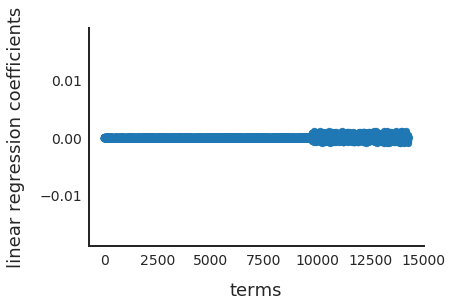

In [136]:
plt.scatter(range(ABAvox.shape[1]), model.coef_)
plt.xlabel("terms")
plt.ylabel("linear regression coefficients")
plt.savefig("052620_5.pdf", bbox_inches='tight')
plt.show()

Are these areas all small brain areas?

In [150]:
#get number of samples per brain area
ABAsize = ABApropont.sum(axis=0)
STsize = STpropont.sum(axis=0)

In [163]:
ABAmin = []
STmin = []
areas = list(allST_0)
for i in range(len(onlylinreg)):
    area1 = areas[onlylinreg[i][0]]
    area2 = areas[onlylinreg[i][1]]
    STmin.append(min(STsize[area1],STsize[area2]))
    ABAmin.append(min(ABAsize[area1],ABAsize[area2]))

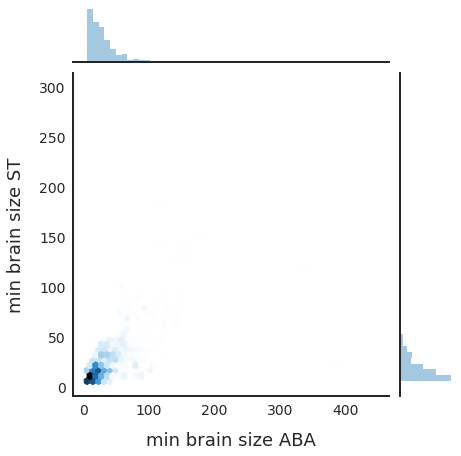

In [171]:
sns.jointplot(ABAmin, STmin, kind='hex').set_axis_labels("min brain size ABA", "min brain size ST")
plt.savefig("052720_2.pdf", bbox_inches='tight')
plt.show()